# Group5 - Inclass Activity 3 - Part 2

### Part 2. Engineer a new feature and compare your Activity 2 results with and without this new feature.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('C:\\Users\\daivi\\Desktop\\CBD 2214 Big Data Fundamentals\\In Class Assignment\\Inclass Activity 3\\week5 inclass.csv')

In [5]:
df.shape

(221046, 22)

In [6]:
df

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.000000,0,1401,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.000000,0,1,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.000000,50,328,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973


#### In this dataset we have 21 Features(Columns) and 221046 Samples(Rows)

### Feature descriptions:

- **symbol**: the underlying stock

- **date**: the dataset date

- **adjusted close**: the closing price of the underlying stock after extended trading session

- **stock price**: the closing price of the underlying stock

- **option symbol**: string combining other fields identifying the option

- **expiration**: date that the option expires

- **strike**: the price that the option gives you the right to trade the underlying stock

- **call/put**: whether the option is a Call (right to buy underlying stock) or a Put (right to sell underlying stock)

- **ask/bid/meanprice**: market prices of the option (last offer to sell, last offer to buy, and the average of the two prices)

- **iv**: how fearful the market is of a market crash or severe decline in prices

- **volume**: number of contracts traded today

- **open interest**: number of contracts currently held
- **delta** - represents the rate of change between the options price and the 1$ change in the underlying stock(price sensitivity of the option)
- **vega** - represents the rate of change between an options value and the underlying assets. This is the option's sensitivity to volatility
- **theta** -  represents the rate of change between the option price and time, or time sensitivity - sometimes known as an option's time decay.
- **gamma** -  represents the rate of change between an option's delta and the underlying asset's price. This is called second-order (second-derivative) price sensitivity. 
- **rho** - represents the rate of change between an option's value and a 1% change in the interest rate. This measures sensitivity to the interest rate.

### * In this we will be checking for the data extraction by checking on the null values duplicates, if there are none then we get will get our final dataset; if there are null values we will be cleaning and validating the data

In [7]:
# Check for missing values
df.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

In [8]:
# Dropping the column * as it is redundant column and mostly contain empty value
df.drop('*', axis=1, inplace=True)

In [9]:
# Checking for available columns
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho'],
      dtype='object')

In [10]:
df.isnull().sum()

symbol                0
exchange              0
date                  0
adjusted close        0
option symbol         0
expiration            0
strike                0
call/put              0
style                 0
ask                   0
bid                   0
mean price            0
iv                    0
volume                0
open interest         0
stock price for iv    0
delta                 0
vega                  0
gamma                 0
theta                 0
rho                   0
dtype: int64

In [11]:
# Drop rows with missing values
print(df.dropna(inplace=True))

None


In [12]:
# Check for duplicates
print(df.duplicated().sum())

0


#### As we can see there are no duplicate value so we don't need to drop any duplicate value

In [13]:
# Checking the data types
print(df.dtypes)

symbol                 object
exchange               object
date                   object
adjusted close        float64
option symbol          object
expiration             object
strike                float64
call/put               object
style                  object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                  int64
open interest           int64
stock price for iv    float64
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object


##### As we can see that we need to change the datatype of date feature(Column)

In [14]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [15]:
# We also need to convert expiration column to datetime
df['expiration'] = pd.to_datetime(df['expiration'])

In [16]:
# Lets convert the 'date' column to datetime format for easy filtering
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [17]:
# Checking the data types again to see the changed data type of date and expiration
print(df.dtypes)

symbol                        object
exchange                      object
date                  datetime64[ns]
adjusted close               float64
option symbol                 object
expiration            datetime64[ns]
strike                       float64
call/put                      object
style                         object
ask                          float64
bid                          float64
mean price                   float64
iv                           float64
volume                         int64
open interest                  int64
stock price for iv           float64
delta                        float64
vega                         float64
gamma                        float64
theta                        float64
rho                          float64
dtype: object


### Analysing Outliers

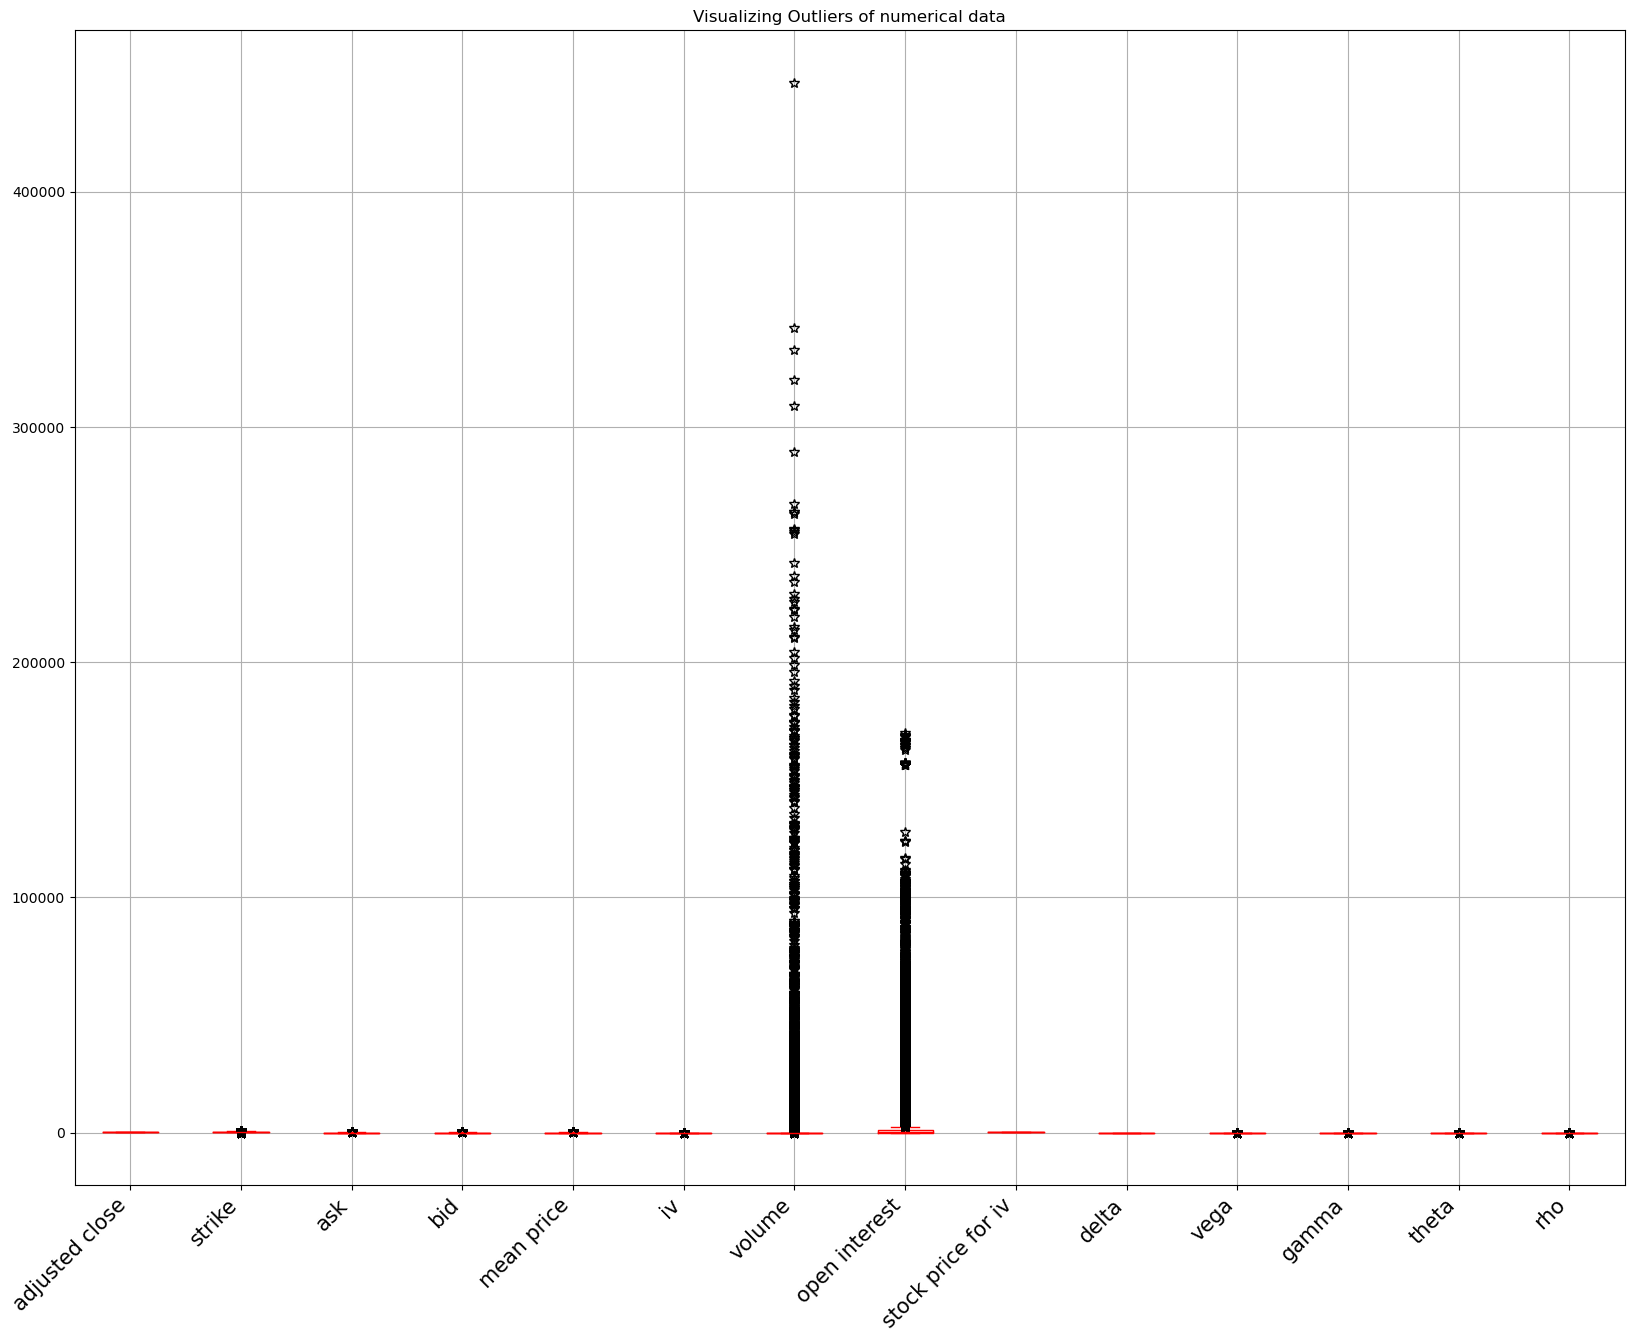

In [20]:

numerical_features = df.select_dtypes(include=['int','float']).columns.tolist()

plt.figure(figsize=(20, 15))  
df[numerical_features].boxplot(color='red',flierprops=dict(marker='*', color='yellow', markersize=7))
plt.xticks(rotation=45, ha='right',size=15)
plt.title('Visualizing Outliers of numerical data')
plt.show()


As we can see the columns **"Volume" and "Open Interest"** have many outliers. 

### Data Analysis

### Linear Regression

In [21]:
# Filter data for July 1 to July 29, 2021
start_date = '2021-07-01'
end_date = '2021-07-29'
data_train = df[df['date'] <= end_date]
data_test = df[df['date'] == '2021-07-30']

In [22]:
# Lets check the date in our data_test
data_test['date']

0       2021-07-30
1       2021-07-30
2       2021-07-30
3       2021-07-30
4       2021-07-30
           ...    
10721   2021-07-30
10722   2021-07-30
10723   2021-07-30
10724   2021-07-30
10725   2021-07-30
Name: date, Length: 10726, dtype: datetime64[ns]

In [23]:
# Lets check the dates in our data_train
data_train['date']

10726    2021-07-29
10727    2021-07-29
10728    2021-07-29
10729    2021-07-29
10730    2021-07-29
            ...    
221041   2021-07-01
221042   2021-07-01
221043   2021-07-01
221044   2021-07-01
221045   2021-07-01
Name: date, Length: 210320, dtype: datetime64[ns]

In [24]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int','float']).columns.tolist()

In [25]:
numerical_features.remove('bid')

In [26]:
numerical_features

['adjusted close',
 'strike',
 'ask',
 'mean price',
 'iv',
 'volume',
 'open interest',
 'stock price for iv',
 'delta',
 'vega',
 'gamma',
 'theta',
 'rho']

In [27]:
df.shape

(221046, 21)

In [28]:
# df without data for the date July 30 2021
data_train.shape

(210320, 21)

In [29]:
data_test.shape

(10726, 21)

- 10726 records are for the date - July 30 2021. This is our testing set

In [30]:
# Split the data into features (X) and target (y)
X = data_train[numerical_features]
y = data_train['bid'] 

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)
y_train, y_test
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [31]:
# Evaluate the model on the Training set
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)  
r2 = r2_score(y_train, y_pred)  

# Print evaluation metrics
print(f"Mean Squared Error of training set: {mse}")
print(f"R-squared of training set: {r2}")


# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

# Print evaluation metrics
print(f"Mean Squared Error of testing set: {mse}")
print(f"R-squared of testing set: {r2}")


Mean Squared Error of training set: 0.013701504635471418
R-squared of training set: 0.9999961770887381
Mean Squared Error of testing set: 0.015106926042732411
R-squared of testing set: 0.9999957992261891


- Our Training set has a MSE of 0.0137
- Our Training set has an R-squared of 0.9999
- Our Testing set has a MSE of 0.0151
- Our Testing set has an R-squared of 0.9999

- Our model is working to predict our target variable 'bid'.

#### Mean Squared Error:
- the Mean Square Error (MSE) is a crucial metric for evaluating the performance of predictive models. 
- It measures the average squared difference between the predicted and the actual target values within a dataset.
#### R Squared Error:
- R-squared is a statistical measure that represents the goodness of fit of a regression model.
- The value of R-square lies between 0 to 1.
- Where we get R-square equals 1 when the model perfectly fits the data and there is no difference between the predicted value and actual value.

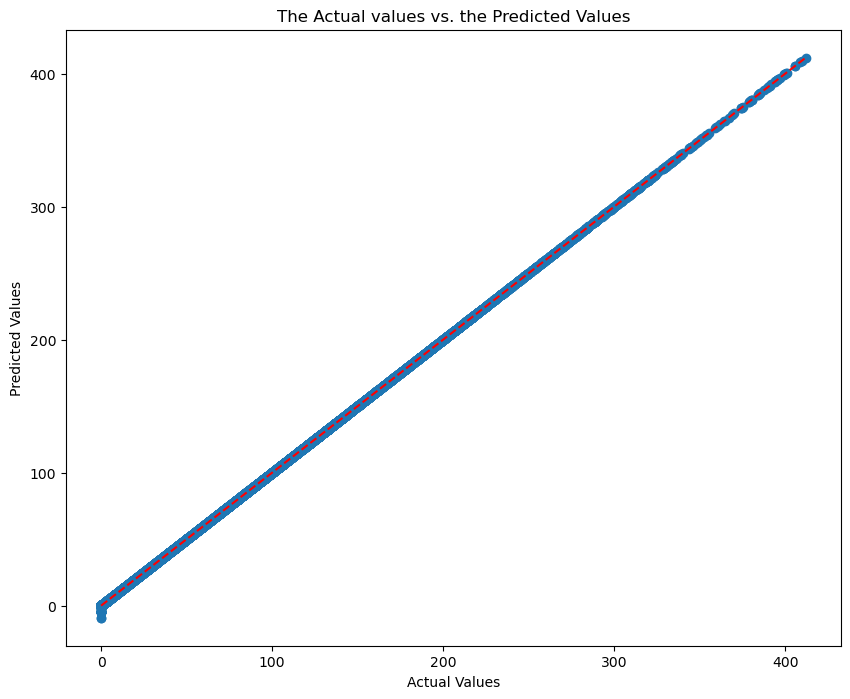

In [32]:
# Lets plot our predicted output of our model with the actual output
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Red Dashed Diagonal line: Represents the ideal case
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('The Actual values vs. the Predicted Values')
plt.show()


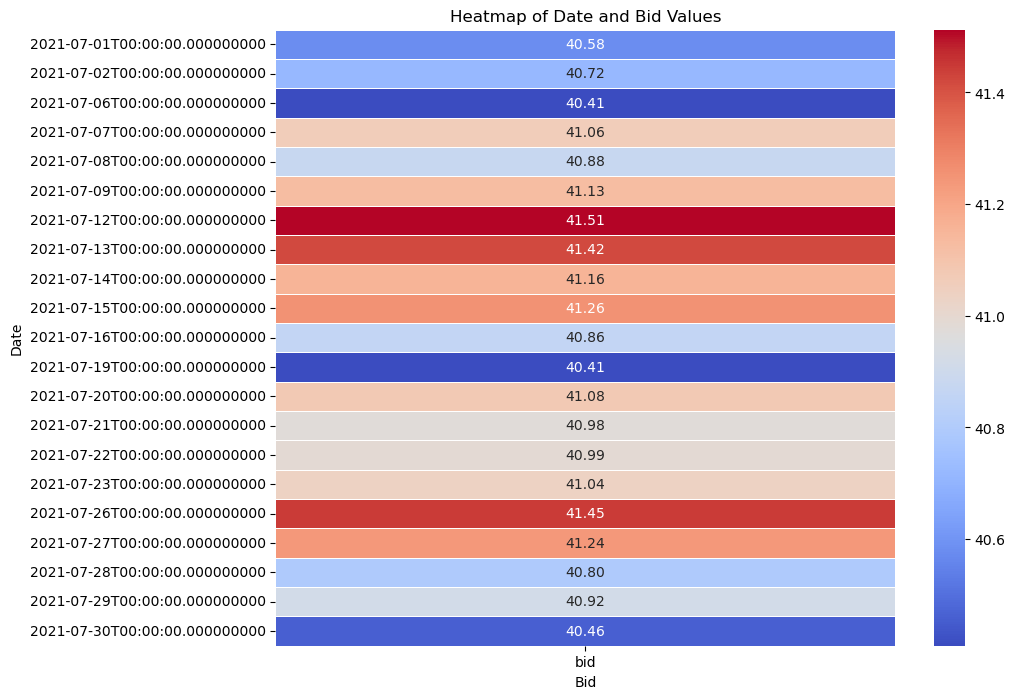

In [33]:
# Lets visualise our data
pivot_table = df.pivot_table(values='bid', index='date', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Heatmap of Date and Bid Values')
plt.xlabel('Bid')
plt.ylabel('Date')
plt.show()


#### KNN

In [34]:
# Select numerical features
KNN_numerical_features = df.select_dtypes(include=['int','float']).columns.tolist()

In [35]:
KNN_numerical_features.remove('bid')

In [36]:
KNN_numerical_features

['adjusted close',
 'strike',
 'ask',
 'mean price',
 'iv',
 'volume',
 'open interest',
 'stock price for iv',
 'delta',
 'vega',
 'gamma',
 'theta',
 'rho']

In [37]:
X = df[KNN_numerical_features]
y = df['bid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Lets initialise and train our KNN Model
k = 5 # Number of neighbours
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

#Predict on the testing set
y_pred = knn_model.predict(X_test)

# Evaluate our KNN model
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.015106926042732411
R-squared: 0.9999957992261891


- Our mean squared error is a very small value, close to 0 hence our predicted output is very close to our actual values
- Our R squared error is close to 1, so our model is predicting with high accuracy
- Our Error is 1.5%
- Our Accuracy is 98.5%

In [38]:
# Lets see how we score on the training and testing set
# Evaluate the model on the Training set
y_pred = knn_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)  
r2 = r2_score(y_train, y_pred)  

# Print evaluation metrics
print(f"Mean Squared Error of training set: {mse}")
print(f"R-squared of training set: {r2}")


# Evaluate the model on the testing set
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

# Print evaluation metrics
print(f"Mean Squared Error of testing set: {mse}")
print(f"R-squared of testing set: {r2}")

Mean Squared Error of training set: 3.8563249448302384
R-squared of training set: 0.9989308338487118
Mean Squared Error of testing set: 6.453639648767247
R-squared of testing set: 0.9981552437469556


- Our Training set has an Mean Squared Error of 3.85%
- Our Training set has an R-squared of 0.9989
- Our Testing  set has an Mean Squared Error of 6.45%
- Our Testing  set has an R-squared of 0.9982

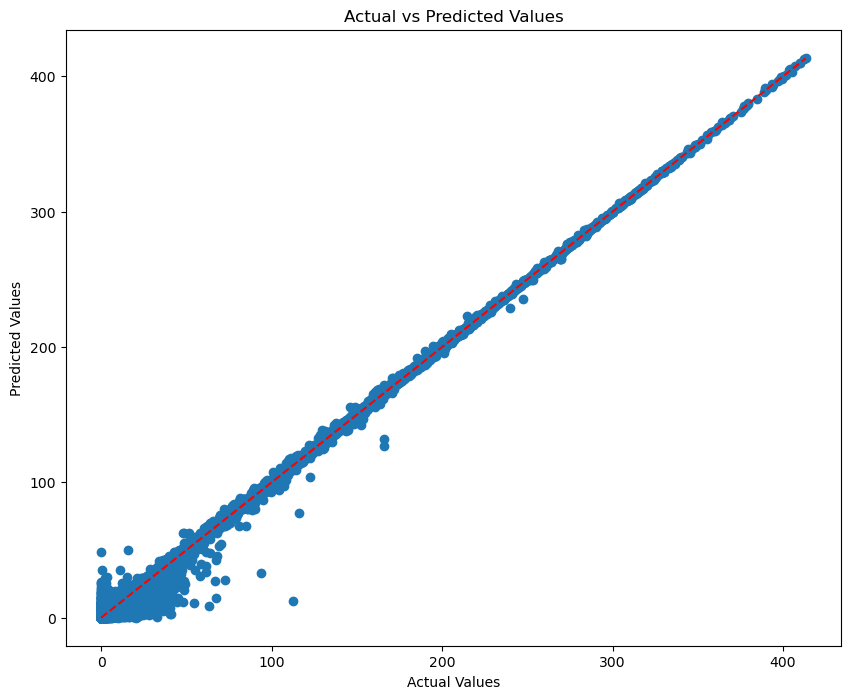

In [39]:
plt.figure(figsize = (10, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values')
plt.show()

As we can see our predicted values and actual values fall on the same line

### Random Forest Regression

In [40]:
# Define hyperparameters
# n_estimators is the number of trees
n_estimators = 10  
# Maxium depth of the trees
max_depth = None  
# Min samples required to split a node
min_samples_split = 2 
# Min samples required to be at node
min_samples_leaf = 1

In [41]:
# Lets initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=90)

In [42]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)  

# Make predictions
y_pred = rf_model.predict(X_test)  

# Evaluate the model
# Use appropriate evaluation metrics for your specific task (e.g., mean squared error for regression)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.012535941732639664
R-squared: 0.9999964166333793


In [43]:
# Lets see how we score on the training and testing set
# Evaluate the model on the Training set
y_pred = rf_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)  
r2 = r2_score(y_train, y_pred)  

# Print evaluation metrics
print(f"Mean Squared Error of training set: {mse}")
print(f"R-squared of training set: {r2}")


# Evaluate the model on the testing set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

# Print evaluation metrics
print(f"Mean Squared Error of testing set: {mse}")
print(f"R-squared of testing set: {r2}")

Mean Squared Error of training set: 0.0022608683469429293
R-squared of training set: 0.9999993731742154
Mean Squared Error of testing set: 0.012535941732639664
R-squared of testing set: 0.9999964166333793


- Our Training set has a MSE of 0.0023
- Our Training set has an R-squared of 0.999
- Our Testing set has a MSE of 0.0125
- Our Testing set has an R-squared of 0.999

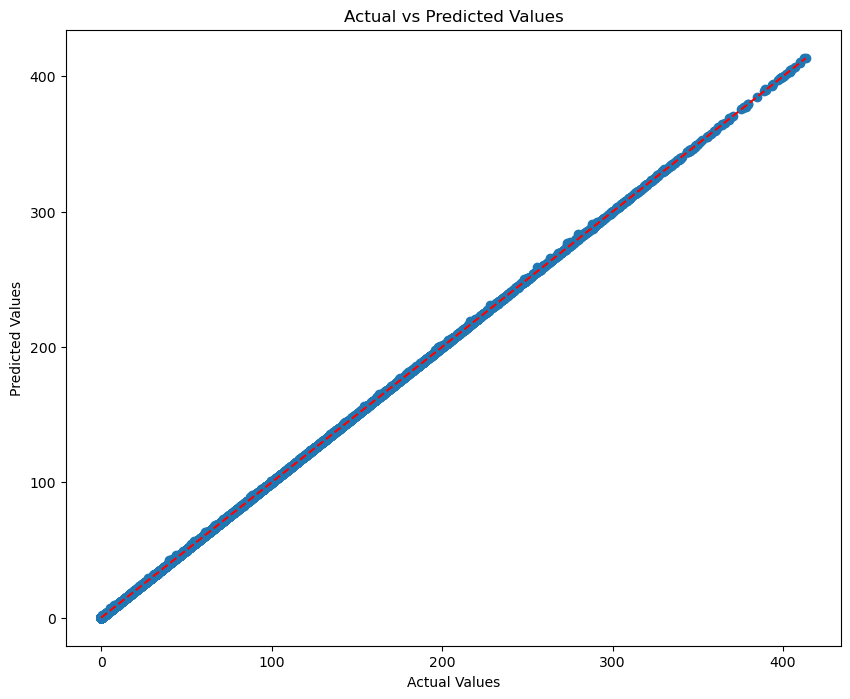

In [44]:
plt.figure(figsize = (10, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values')
plt.show()

As we can see our predicted value falls on our actual values

# Feature Engineering - Lets add a new feature in this section

### Analyzing correlation of dataset inorder to find correct match between 2 features to generate new feature

In [45]:
# Drop non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
adjusted close,1.000000,0.016490,0.002918,0.002511,0.002721,-0.003073,-0.008051,0.008685,0.996243,0.017865,-0.001789,0.002520,0.030250,0.008098
strike,0.016490,1.000000,-0.319156,-0.322220,-0.320711,-0.574573,0.023565,-0.058686,0.016942,-0.472470,0.128154,0.197369,-0.078016,-0.378695
ask,0.002918,-0.319156,1.000000,0.999817,0.999953,0.373107,-0.051920,-0.146613,0.002873,0.335986,-0.010311,-0.251779,0.234647,-0.016752
bid,0.002511,-0.322220,0.999817,1.000000,0.999954,0.376161,-0.051600,-0.145546,0.002505,0.339313,-0.019067,-0.250529,0.232326,-0.013440
mean price,0.002721,-0.320711,0.999953,0.999954,1.000000,0.374645,-0.051761,-0.146081,0.002695,0.337654,-0.014654,-0.251149,0.233473,-0.015107
iv,-0.003073,-0.574573,0.373107,0.376161,0.374645,1.000000,-0.126601,-0.001707,-0.004614,0.323266,-0.106163,-0.202550,0.068170,0.125040
volume,-0.008051,0.023565,-0.051920,-0.051600,-0.051761,-0.126601,1.000000,0.185569,-0.008142,-0.012911,-0.049532,0.278318,-0.226557,0.002718
open interest,0.008685,-0.058686,-0.146613,-0.145546,-0.146081,-0.001707,0.185569,1.000000,0.008777,-0.017046,-0.051157,0.082769,-0.120480,0.021480
stock price for iv,0.996243,0.016942,0.002873,0.002505,0.002695,-0.004614,-0.008142,0.008777,1.000000,0.017548,-0.002040,0.002175,0.030413,0.007912
delta,0.017865,-0.472470,0.335986,0.339313,0.337654,0.323266,-0.012911,-0.017046,0.017548,1.000000,-0.023021,-0.081819,-0.091948,0.579338


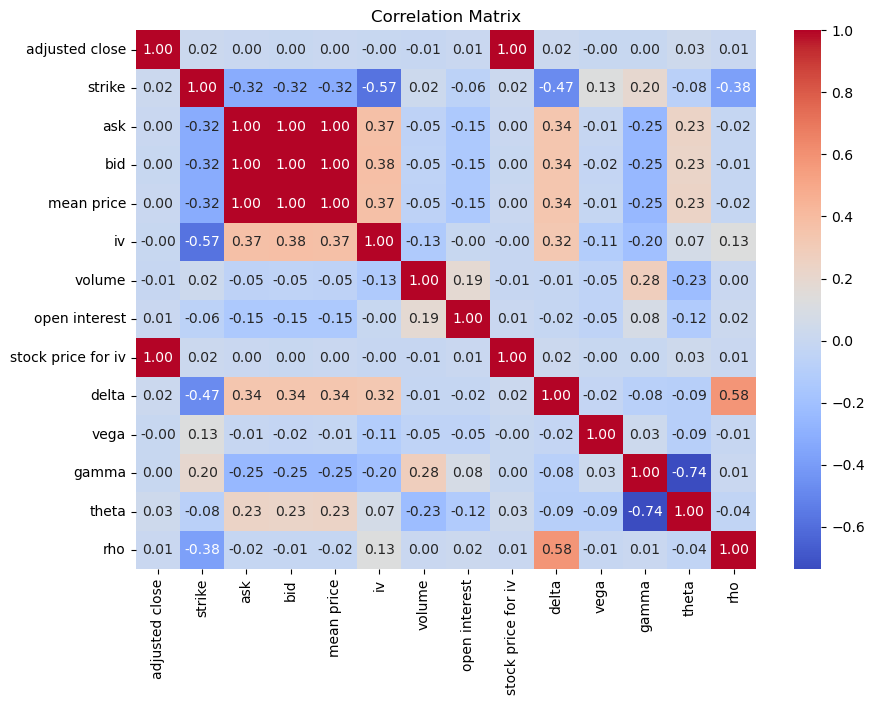

In [46]:
# heatmap of correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

### Creating a New Feature: Mid Price

In [47]:
# To create a new feature from the ask and bid prices, we can use the mid-price, which is the average of ask and bid.
# This feature can provide a more stable measure of the option's price by mitigating the noise in individual ask or bid prices.

df['mid_price'] = (df['ask'] + df['bid']) / 2

In [48]:
# Calculate the correlation matrix with the new feature
correlation_matrix_with_new_feature = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = correlation_matrix_with_new_feature.corr()

# Display the correlation matrix
correlation_matrix

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,mid_price
adjusted close,1.000000,0.016490,0.002918,0.002511,0.002721,-0.003073,-0.008051,0.008685,0.996243,0.017865,-0.001789,0.002520,0.030250,0.008098,0.002716
strike,0.016490,1.000000,-0.319156,-0.322220,-0.320711,-0.574573,0.023565,-0.058686,0.016942,-0.472470,0.128154,0.197369,-0.078016,-0.378695,-0.320695
ask,0.002918,-0.319156,1.000000,0.999817,0.999953,0.373107,-0.051920,-0.146613,0.002873,0.335986,-0.010311,-0.251779,0.234647,-0.016752,0.999955
bid,0.002511,-0.322220,0.999817,1.000000,0.999954,0.376161,-0.051600,-0.145546,0.002505,0.339313,-0.019067,-0.250529,0.232326,-0.013440,0.999954
mean price,0.002721,-0.320711,0.999953,0.999954,1.000000,0.374645,-0.051761,-0.146081,0.002695,0.337654,-0.014654,-0.251149,0.233473,-0.015107,0.999999
iv,-0.003073,-0.574573,0.373107,0.376161,0.374645,1.000000,-0.126601,-0.001707,-0.004614,0.323266,-0.106163,-0.202550,0.068170,0.125040,0.374643
volume,-0.008051,0.023565,-0.051920,-0.051600,-0.051761,-0.126601,1.000000,0.185569,-0.008142,-0.012911,-0.049532,0.278318,-0.226557,0.002718,-0.051763
open interest,0.008685,-0.058686,-0.146613,-0.145546,-0.146081,-0.001707,0.185569,1.000000,0.008777,-0.017046,-0.051157,0.082769,-0.120480,0.021480,-0.146089
stock price for iv,0.996243,0.016942,0.002873,0.002505,0.002695,-0.004614,-0.008142,0.008777,1.000000,0.017548,-0.002040,0.002175,0.030413,0.007912,0.002690
delta,0.017865,-0.472470,0.335986,0.339313,0.337654,0.323266,-0.012911,-0.017046,0.017548,1.000000,-0.023021,-0.081819,-0.091948,0.579338,0.337657


In [49]:
df[['bid','ask','mid_price']]

,bid,ask,mid_price
0,223.35,224.56,223.955
1,0.00,0.01,0.005
2,218.35,219.56,218.955
3,0.00,0.01,0.005
4,213.35,214.56,213.955
...,...,...,...
221041,201.50,206.50,204.000
221042,1.80,2.20,2.000
221043,206.50,211.50,209.000
221044,1.30,2.73,2.015


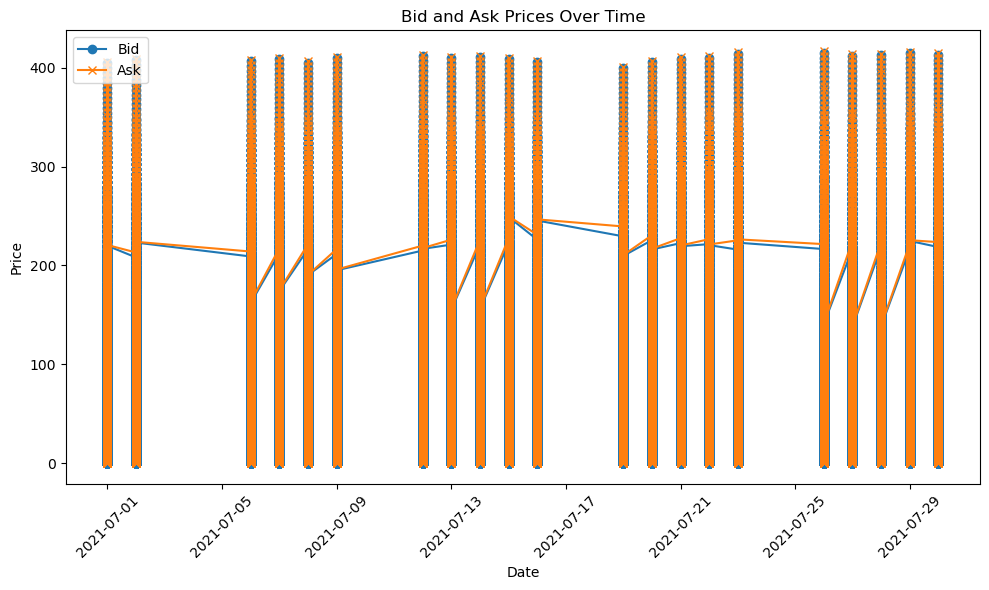

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['bid'], label='Bid', marker='o')
plt.plot(df['date'], df['ask'], label='Ask', marker='x')

# Adding titles and labels
plt.title('Bid and Ask Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Reason to select mean price

### More about mean price

Mid-price is a financial term used in trading. It refers to the average of the current bid and asks for the prices of a security or asset.<br>
 Ways we can use mid-price
<br>
- Market Indicator: Traders often use the mid-price to indicate the 'fair value of an asset at a given moment.' It represents the point between what buyers are willing to pay (bid) and what sellers are asking (ask).

- Trading Strategies: Many trading strategies involve the mid-price. For example, if a trader believes the current market price is below the mid-price, they might consider buying, anticipating the price will rise to align with the mid-price.

- Execution: When executing large orders, traders may try to execute trades close to the mid-price to avoid paying more than necessary (if buying) or receiving less than desired (if selling).

- Volatility Measurement: The mid-price can also gauge market volatility. If the bid and ask prices are close together, it suggests a stable market, whereas a wider gap indicates higher volatility.
<br>

In summary, the mid-price is a central reference point derived from the bid and ask prices, helping traders assess fair value, make trading decisions, and manage risk.

### Train and Evaluate Models with and without the New Feature:

In [51]:
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho', 'mid_price'],
      dtype='object')

In [52]:
# Define features and target
features = ['adjusted close', 'strike', 'ask', 'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega', 'gamma', 'theta', 'rho']
target = 'bid'

# Prepare the dataset without the new feature
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

# Evaluate the model
mse_without_new_feature = mean_squared_error(y_test, preds)
print("Mean Squared Error (without new feature):", mse_without_new_feature)


Mean Squared Error (without new feature): 0.9264768344929042


In [53]:
# Add the new feature
features.append('mid_price')

# Prepare the dataset with the new feature
X = df[features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LinearRegression model
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

# Evaluate the model
mse_with_new_feature = mean_squared_error(y_test, preds)
print("Mean Squared Error (with new feature 'mid_price'):", mse_with_new_feature)

Mean Squared Error (with new feature 'mid_price'): 6.264595045489154e-24


In [54]:
# Compare the MSE
print(f'MSE without new feature: {mse_without_new_feature}')
print(f'MSE with new feature: {mse_with_new_feature}')

MSE without new feature: 0.9264768344929042
MSE with new feature: 6.264595045489154e-24


## BEST CASE - We can remove bid and ask, which will provide better accuracy due to new feature

In [55]:
# Add the new feature
features.append('mid_price')


# Remove 'bid' and 'ask' from the features list using list comprehension
features = [feature for feature in features if feature not in ['bid', 'ask']]

# Prepare the dataset with the new feature
X = df[features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LinearRegression model
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

# Evaluate the model
mse_with_new_feature_old_del = mean_squared_error(y_test, preds)
print("MSE with new feature 'mid_price', and dropping old feature:", mse_with_new_feature_old_del)


MSE with new feature 'mid_price', and dropping old feature: 0.23411192975440703


In [56]:
# Compare the MSE of ALL CASES
print(f'MSE without new feature: {mse_without_new_feature}')
print(f'MSE with new feature: {mse_with_new_feature}')
print("MSE with new feature 'mid_price', and dropping old feature:", mse_with_new_feature_old_del)


MSE without new feature: 0.9264768344929042
MSE with new feature: 6.264595045489154e-24
MSE with new feature 'mid_price', and dropping old feature: 0.23411192975440703


### Conclusion
- Adding the new feature mid price reduces the MSE to 6.4849064929061125e-24
- This suggests that the new feature is extremely predictive to our target variable 'bid'
- After introducing mid price and dropping the old features the MSE is 0.23411192975440492 This is lower than the MSE without the new feature but higher than when both the old and new features are included.
- This tells us that the old features shouldn't be dropped as they still contain some useful information and impact the models prediction
<br>
<br>
- Our new feature has a very significant impact on the model's performance, reducing the MSE. But the old features still contain some useful information. So they shouldnt be dropped